In [31]:
! pip install PrettyTable


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Load the needed libraries

In [1]:
# python
import datetime
from os.path import join, exists
from os import makedirs
import warnings
from datetime import datetime, timedelta

# data-science
import pandas as pd
import scipy
import numpy as np
import matplotlib.pyplot as plt

In [32]:
#Model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn import neighbors
import xgboost as xgb
from sklearn.neural_network import MLPRegressor

from prettytable import PrettyTable
from sklearn import metrics 

%pylab inline
%matplotlib inline
plt.rcParams['figure.figsize'] = [18, 5]
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [8]:
BASE_PATH = "../Final_dataset/"


Campus Meta Data available

In [9]:
campus_meta_data_path = BASE_PATH + 'campus_meta.csv'
campus_meta_data = pd.read_csv(campus_meta_data_path)
campus_meta_data

,id,name,capacity
0,1,Bundoora,26000
1,2,Albury-Wodonga,800
2,3,Bendigo,5000
3,4,Mildura,500
4,5,Shepparton,700


Building Meta Data available

In [10]:
campus_building_meta_data_path = BASE_PATH + 'building_meta.csv'
campus_building_meta_data = pd.read_csv(campus_building_meta_data_path, keep_default_na=False)
campus_building_meta_data

,campus_id,id,built_year,category,gross_floor_area,room_area,capacity
0,1,1,,other,,,
1,1,2,,other,,,
2,1,3,,other,,,
3,1,4,1967,mixed use,145558.14000000016,1790.17,79.0
4,1,5,1899,other,0.0,,
...,...,...,...,...,...,...,...
59,1,60,1966,mixed use,1208347.8399999996,7756.220000000001,691.0
60,1,61,1966,mixed use,1208347.8399999996,7756.220000000001,691.0
61,1,62,1968,teaching,1274716.1699999983,7615.16,1331.0
62,1,63,1972,mixed use,1640647.3800000031,12387.619999999997,1362.0


Load and visualise NMI electricity consumption data

In [15]:
data_nmi_electricity_consumption_path = BASE_PATH + 'nmi_consumption.csv'
data_nmi_electricity_consumption = pd.read_csv(data_nmi_electricity_consumption_path)
data_nmi_electricity_consumption

,campus_id,meter_id,timestamp,consumption,demand_kW,demand_kVA
0,1.0,1,2015-11-22 17:15:00,17.300,69.200,76.926
1,1.0,1,2015-11-22 17:30:00,23.000,92.000,92.886
2,1.0,1,2015-11-22 17:45:00,28.300,113.200,125.249
3,1.0,1,2015-11-22 18:00:00,27.100,108.400,113.254
4,1.0,1,2015-11-22 18:15:00,23.200,92.800,93.473
...,...,...,...,...,...,...
3507071,1.0,14,2022-04-28 13:45:00,2.496,9.984,10.307
3507072,1.0,14,2022-04-28 23:00:00,2.336,9.344,9.759
3507073,1.0,14,2022-04-29 05:30:00,2.272,9.088,9.477
3507074,1.0,14,2022-04-29 12:15:00,2.240,8.960,9.137


Visualise the demand of the #5 NMI

<Axes: xlabel='timestamp'>

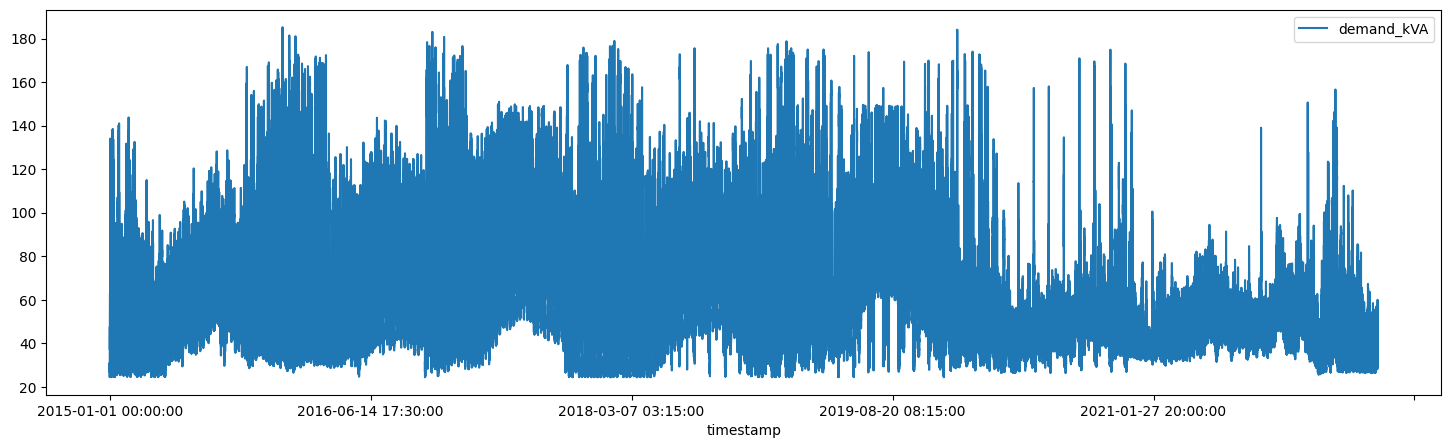

In [16]:
data_nmi_electricity_consumption[(data_nmi_electricity_consumption.meter_id==5) & (data_nmi_electricity_consumption.campus_id==1)][["timestamp", "demand_kVA"]].plot(x="timestamp", y="demand_kVA")

Load and Visualise Weather information

In [17]:
weather_data_path = BASE_PATH + 'weather_data.csv'
weather_data = pd.read_csv(weather_data_path)
weather_data

,campus_id,timestamp,apparent_temperature,air_temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction
0,1,2018-01-01 00:00:00,16.6,16.2,13.5,84.0,3.6,142.0
1,1,2018-01-01 00:01:00,17.2,16.1,13.6,85.0,0.0,134.0
2,1,2018-01-01 00:02:00,16.9,16.1,13.6,85.0,1.8,130.0
3,1,2018-01-01 00:03:00,16.9,16.1,13.6,85.0,1.8,130.0
4,1,2018-01-01 00:04:00,16.0,16.0,13.5,85.0,5.4,129.0
...,...,...,...,...,...,...,...,...
7396515,5,2022-04-30 21:30:00,7.5,9.7,7.8,88.0,NaN,NaN
7396516,5,2022-04-30 22:00:00,7.4,9.3,7.7,90.0,NaN,NaN
7396517,5,2022-04-30 22:30:00,7.5,9.4,7.7,89.0,NaN,NaN
7396518,5,2022-04-30 23:00:00,7.7,9.2,8.3,94.0,NaN,NaN


Load and visualise building electricity consumption data

In [18]:
building_data_path = BASE_PATH + 'building_consumption.csv'
building_data = pd.read_csv(building_data_path)
building_data

,campus_id,meter_id,timestamp,consumption
0,1,1,2019-03-29 01:15:00,0.01100
1,1,1,2019-03-29 01:30:00,0.02100
2,1,1,2019-03-29 01:45:00,0.03800
3,1,1,2019-03-29 02:00:00,0.87100
4,1,1,2019-03-29 02:15:00,0.87300
...,...,...,...,...
8095519,1,64,2022-04-30 22:45:00,0.84375
8095520,1,64,2022-04-30 23:00:00,1.15625
8095521,1,64,2022-04-30 23:15:00,1.32813
8095522,1,64,2022-04-30 23:30:00,1.21875


<Axes: xlabel='timestamp'>

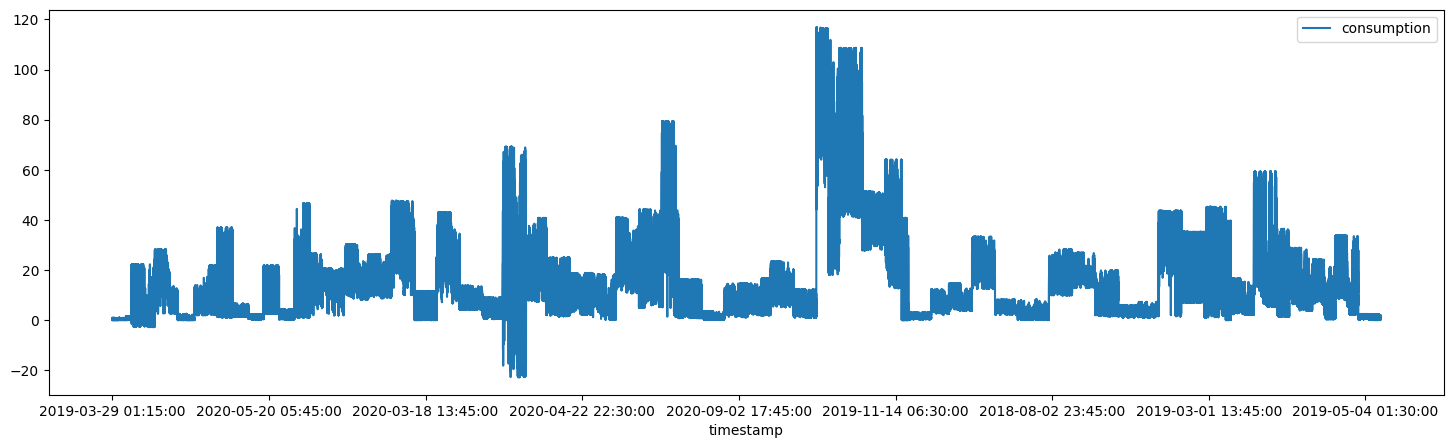

In [19]:
building_data.plot(x="timestamp", y="consumption")


Merging building consumption with weather data

In [20]:
df_comumption_building_39 = building_data[(building_data.meter_id==39) & (building_data.campus_id==1)][["timestamp", "consumption"]]
weather_data_bundoora = weather_data[weather_data.campus_id==1]

df_building_consumption_with_weather = pd.merge(df_comumption_building_39, weather_data_bundoora, how="left", on=["timestamp"])
df_building_consumption_with_weather

,timestamp,consumption,campus_id,apparent_temperature,air_temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction
0,2018-01-01 02:15:00,32.125,1.0,16.1,14.9,13.8,93.0,0.0,120.0
1,2018-01-01 02:30:00,32.000,1.0,15.8,14.8,14.2,96.0,1.8,89.0
2,2018-01-01 02:45:00,32.250,1.0,16.0,14.7,14.2,97.0,0.0,89.0
3,2018-01-01 03:00:00,32.250,1.0,15.9,14.8,14.6,99.0,1.8,89.0
4,2018-01-01 03:15:00,31.625,1.0,16.2,14.7,14.5,99.0,0.0,89.0
...,...,...,...,...,...,...,...,...,...
147276,2022-04-30 22:45:00,34.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147277,2022-04-30 23:00:00,34.000,1.0,10.7,13.8,7.1,64.0,NaN,NaN
147278,2022-04-30 23:15:00,34.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147279,2022-04-30 23:30:00,33.500,1.0,11.2,13.5,7.3,66.0,NaN,NaN


### Creating data and time features
The energy consumption of the building is varying based on the time. Hence features such as hour and minutes can be derived from the timestamp. Most of the academic buildings consume less electricity during the weekends. Hence another binary feature added to indicate a given data is a weekend or not.

In [21]:
#Convert timestamp in to time object
df_building_consumption_with_weather['timestamp'] = pd.to_datetime(df_building_consumption_with_weather['timestamp'])

In [22]:
# Add hour as a feature from timestamp
df_building_consumption_with_weather['hour'] = df_building_consumption_with_weather.timestamp.dt.hour

In [23]:
# Add minutes feature from timestamp
df_building_consumption_with_weather['minutes'] = df_building_consumption_with_weather.timestamp.dt.minute

In [24]:
# Add a feature to indicate whether given day is a weekend or not
df_building_consumption_with_weather["is_weekend"] = df_building_consumption_with_weather.timestamp.dt.day_name().isin(['Saturday', 'Sunday'])
df_building_consumption_with_weather["is_weekend"] = df_building_consumption_with_weather["is_weekend"].astype(int)

In [25]:
#Drop any rows which contains null values
df_building_consumption_with_weather = df_building_consumption_with_weather.dropna()

In [26]:
#Data types of the features
df_building_consumption_with_weather.dtypes

timestamp                datetime64[ns]
consumption                     float64
campus_id                       float64
apparent_temperature            float64
air_temperature                 float64
dew_point_temperature           float64
relative_humidity               float64
wind_speed                      float64
wind_direction                  float64
hour                              int32
minutes                           int32
is_weekend                        int32
dtype: object

Create train and test data splits

In [27]:
X = df_building_consumption_with_weather[['apparent_temperature', 'relative_humidity', 'hour', 'minutes', 'is_weekend']].values
y = df_building_consumption_with_weather['consumption'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Building models

In [28]:
#Multiple linear regression 
fuelLinReg = LinearRegression()
fuelLinReg.fit(X_train, y_train)

#Decision tree 
fuelDecisionTree = tree.DecisionTreeRegressor() # notice here we use the Regressor while for classification we used DecisionTreeClassifier
fuelDecisionTree.fit(X_train,y_train)

# XGBoost 
fuelXGB = xgb.XGBRegressor() # notice here we use the Regressor while for classification we used XGBClassifier
fuelXGB.fit(X_train,y_train)

# Neural network - Multi-layer Perceptron
fuelMLP = MLPRegressor() # notice here we use the Regressor while for classification we used MLPClassifier
fuelMLP.fit(X_train,y_train)

MLPRegressor()

Evaluating the model performance

In [33]:
regressors = [ fuelLinReg, fuelDecisionTree, fuelXGB, fuelMLP]
evalTable = PrettyTable(['Name', 'R-squared', 'MAE', 'RMSE', 'MAPE', 'MedAE' ], sortby='RMSE')
for i in regressors:
  # predict emissions
  y_predict = i.predict(X_test)
  evalTable.add_row( [ type(i).__name__, 
                      (round(i.score(X_test, y_test),3)), 
                      round(metrics.mean_absolute_error(y_test, y_predict),3),
                      round(metrics.mean_squared_error(y_test, y_predict, squared=False),3),
                      round(metrics.mean_absolute_percentage_error(y_test, y_predict),3),
                      round(metrics.median_absolute_error(y_test, y_predict),3),
                    ] )
print(evalTable)

+-----------------------+-----------+-------+-------+-------+-------+
|          Name         | R-squared |  MAE  |  RMSE |  MAPE | MedAE |
+-----------------------+-----------+-------+-------+-------+-------+
|      XGBRegressor     |   0.648   |  2.51 |  3.17 | 0.067 | 2.127 |
|      MLPRegressor     |   0.608   | 2.697 | 3.345 |  0.07 | 2.341 |
| DecisionTreeRegressor |   0.304   | 3.364 | 4.459 | 0.089 |  2.5  |
|    LinearRegression   |   0.283   | 3.618 | 4.525 | 0.095 | 3.011 |
+-----------------------+-----------+-------+-------+-------+-------+


Text(0, 0.5, 'Predicted')

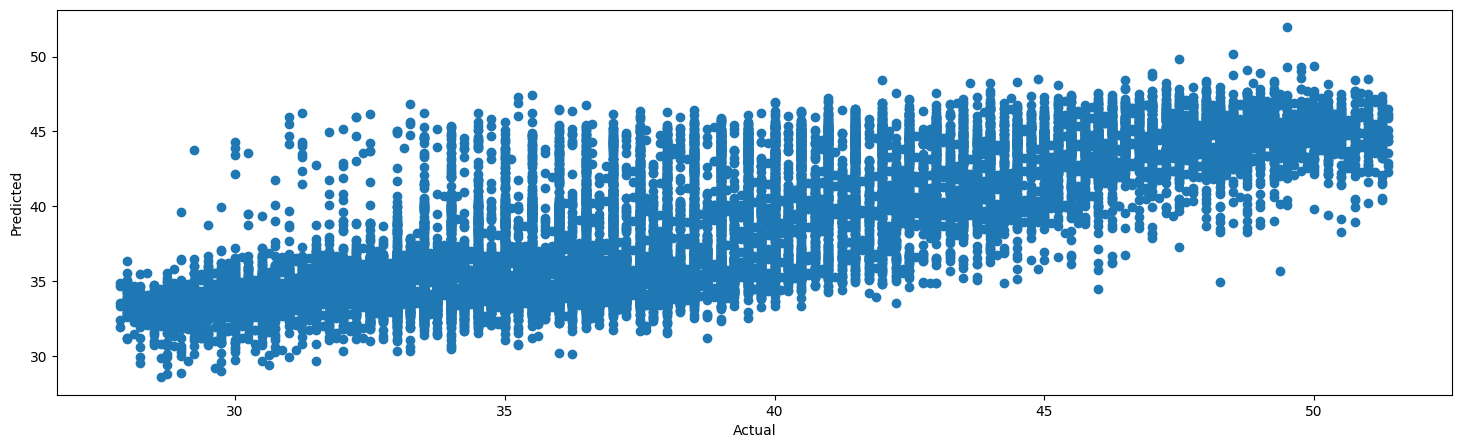

In [34]:
# Visualise actual vs predicted on a scatter plot 
y_predict = fuelXGB.predict(X_test)
plt.scatter(y_test, y_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')

Load and visualise building submeter electricity consumption data

In [35]:
data_submeter_path = BASE_PATH + 'building_submeter_consumption.csv'
data_submeter = pd.read_csv(data_submeter_path)
data_submeter

,building_id,id,campus_id,timestamp,consumption,current,voltage,power,power_factor
0,14.0,1,2.0,2021-04-20 19:05:00+10:00,0.2256,3.96,240.0,2.7073,0.95
1,14.0,1,2.0,2021-04-20 19:10:00+10:00,0.2010,3.53,240.0,2.4118,0.95
2,14.0,1,2.0,2021-04-20 19:15:00+10:00,0.2440,4.28,240.0,2.9284,0.95
3,14.0,1,2.0,2021-04-20 19:20:00+10:00,0.1886,3.31,240.0,2.2636,0.95
4,14.0,1,2.0,2021-04-20 19:25:00+10:00,0.2501,4.39,240.0,3.0009,0.95
...,...,...,...,...,...,...,...,...,...
1665157,30.0,10,1.0,2021-11-08 11:15:00+11:00,0.1484,2.66,235.0,1.7811,0.95
1665158,30.0,10,1.0,2021-11-08 11:20:00+11:00,0.1480,2.65,235.0,1.7757,0.95
1665159,30.0,10,1.0,2021-11-08 11:25:00+11:00,0.1483,2.66,235.0,1.7802,0.95
1665160,30.0,10,1.0,2021-11-08 11:30:00+11:00,0.1482,2.66,235.0,1.7789,0.95


<Axes: xlabel='timestamp'>

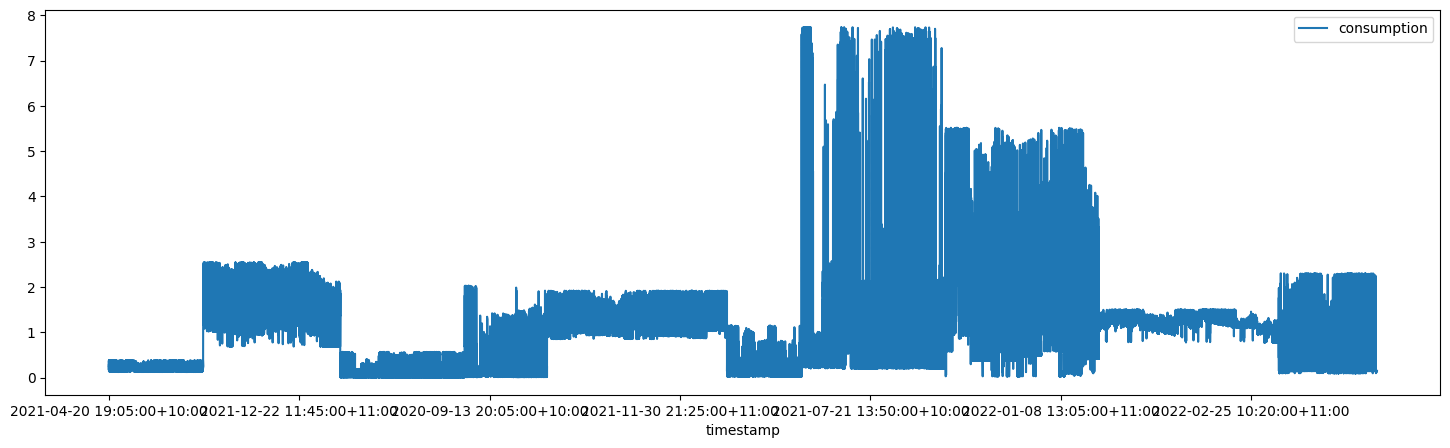

In [36]:
data_submeter.plot(x="timestamp", y="consumption")


Load and visualise gas data

In [37]:
data_gas_path = BASE_PATH + 'gas_consumption.csv'
data_gas = pd.read_csv(data_gas_path)
data_gas

,campus_id,timestamp,consumption
0,1,2018-05-01 06:00:00,24.850209
1,1,2018-05-01 07:00:00,26.404539
2,1,2018-05-01 08:00:00,45.346793
3,1,2018-05-01 09:00:00,38.383031
4,1,2018-05-01 10:00:00,32.777705
...,...,...,...
27159,3,2021-12-24 06:00:00,0.572868
27160,3,2021-12-27 06:00:00,0.529254
27161,3,2021-12-27 07:00:00,1.058622
27162,3,2021-12-28 06:00:00,1.097769


<Axes: xlabel='timestamp'>

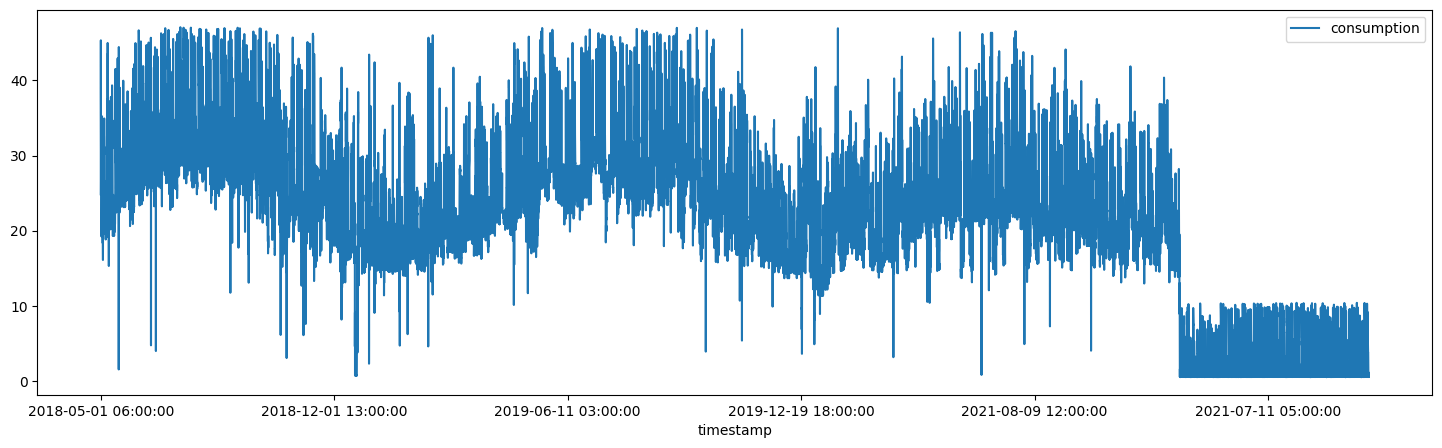

In [38]:
data_gas.plot(x="timestamp", y="consumption")


Load and visualise water data

In [39]:
data_water_path = BASE_PATH + 'water_consumption.csv'
data_water = pd.read_csv(data_water_path)
data_water

,campus_id,meter_id,timestamp,consumption
0,1,1,2021-01-10 00:00:00,438.328
1,1,1,2021-01-10 00:15:00,438.328
2,1,1,2021-01-10 00:30:00,438.328
3,1,1,2021-01-10 00:45:00,438.328
4,1,1,2021-01-10 01:00:00,438.328
...,...,...,...,...
245035,1,15,2022-12-03 22:45:00,34.905
245036,1,15,2022-12-03 23:00:00,34.905
245037,1,15,2022-12-03 23:15:00,34.905
245038,1,15,2022-12-03 23:30:00,34.905


<Axes: xlabel='timestamp'>

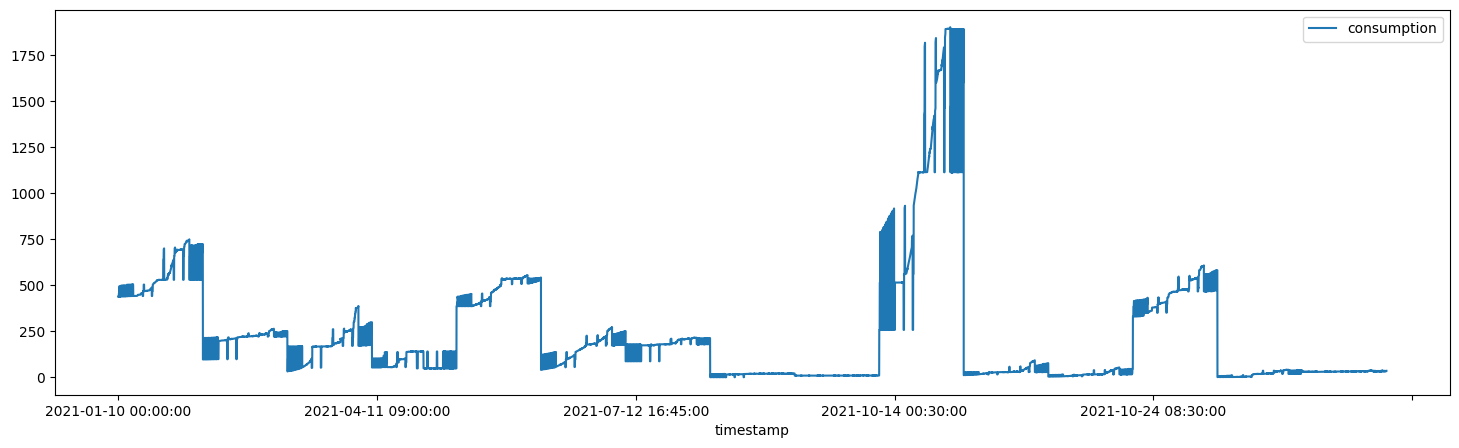

In [40]:
data_water.plot(x="timestamp", y="consumption")
